#  Ames Housing Dataset - Exploratory Data Analysis and Modeling

This notebook walks through data exploration, cleaning and modeling on the Ames Housing Dataset. Our goal is to uncover key insights and build predictive models that estimate housing prices effectively.

**Sections:**
1. Data Loading & Setup
2. Initial Exploration
3. Data Cleaning
4. Exploratory Data Analysis
5. Model Preparation
6. Model Training & Evaluation


# 1. Data Loading & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AmesHousing.csv')

# 2. Initial Exploration

In [3]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.

In [4]:
df.shape 

(2930, 82)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [7]:
df.duplicated().sum()

0

# 3. Data Cleaning

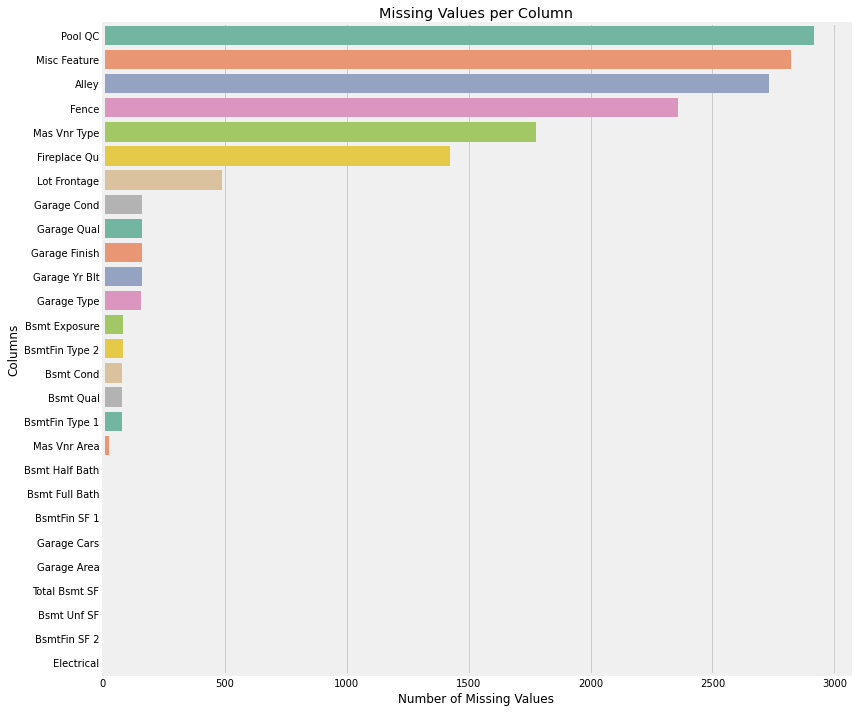

In [8]:
# Checking missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Plotting missing values
plt.figure(figsize=(12, 10))
sns.barplot(x=missing.values, y=missing.index, palette='Set2')
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()



In [9]:
# Filling numeric columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [10]:
# Filling categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
df.isnull().sum().sum() 

0

# 4. Exploratory Data Analysis

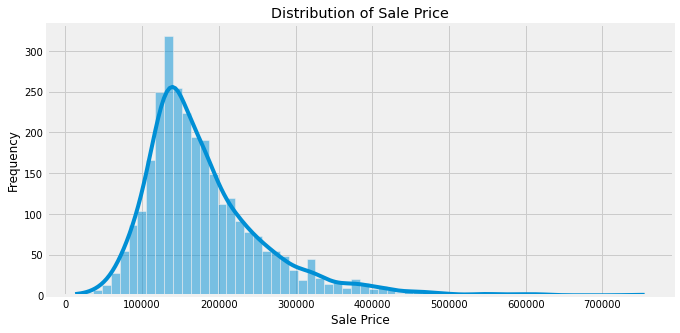

In [12]:
# Distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

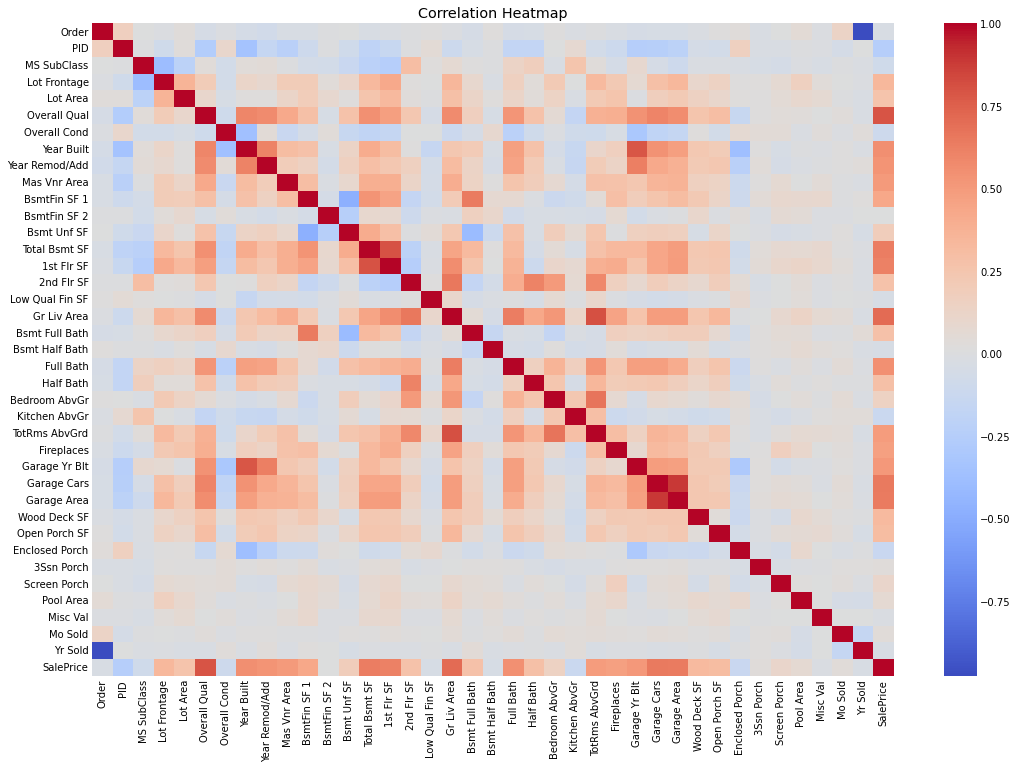

In [13]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
numeric_df = df.select_dtypes(include = [np.number])
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Top 10 correlated features with SalePrice
corr_target = corr['SalePrice'].abs().sort_values(ascending=False)
corr_target[1:11]

Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647812
Garage Area       0.640381
Total Bsmt SF     0.632164
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.508882
Name: SalePrice, dtype: float64

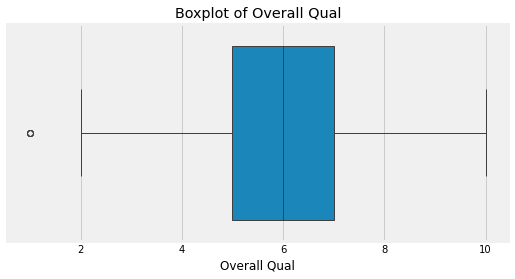

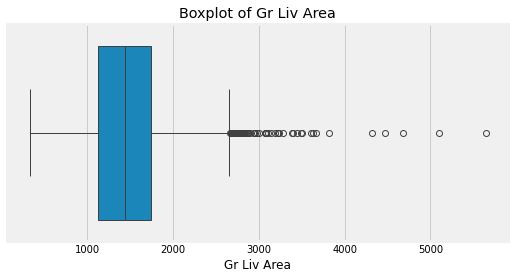

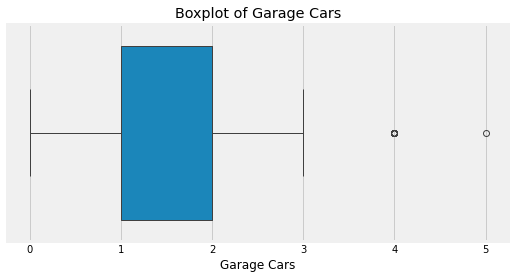

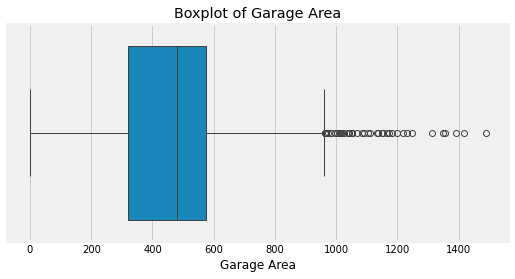

In [15]:
# Boxplots of top features

top_features = corr_target[1:5].index
for col in top_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

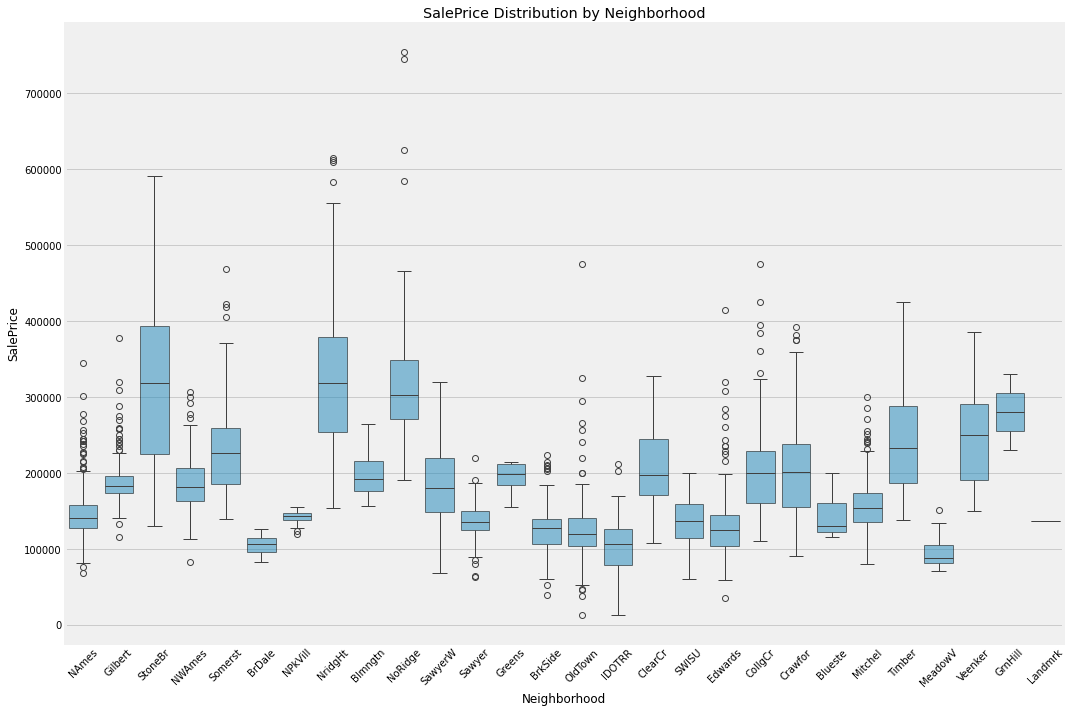

In [21]:
# Sales price distribution by Neighborhood
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=df, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=45)

for patch in ax.patches:
    patch.set_alpha(0.5)
    patch.set_edgecolor('k')

plt.title('SalePrice Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()


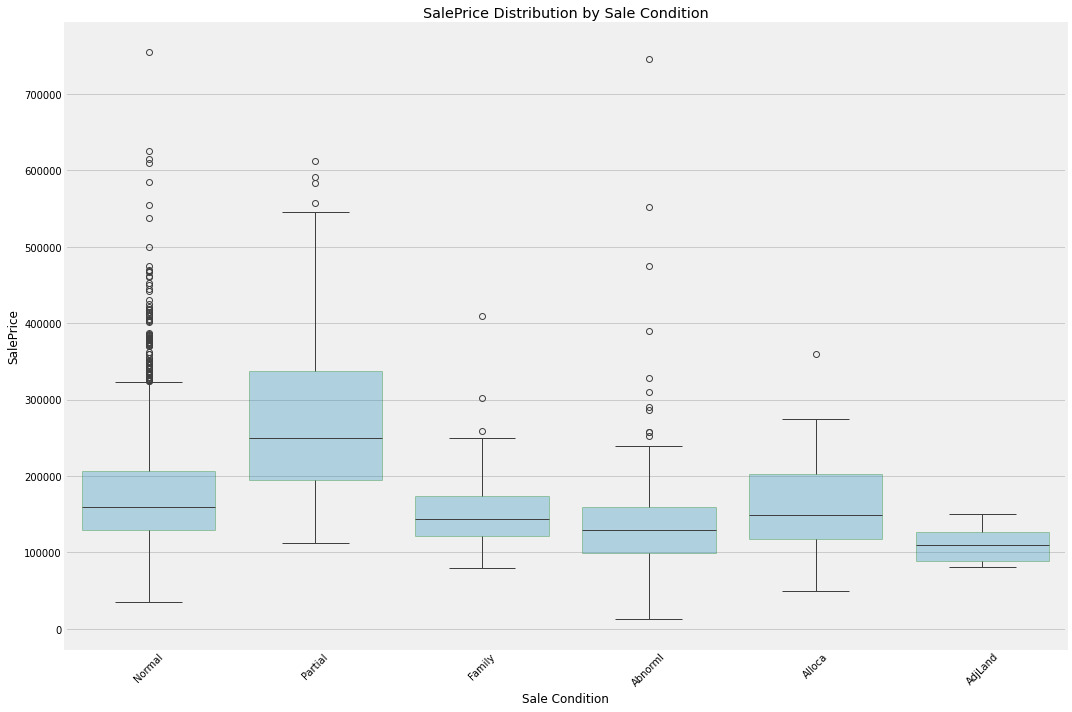

In [22]:
#SalesPrice Distribution by Sale Condition

plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=df, x='Sale Condition', y='SalePrice')

for patch in ax.patches:
    patch.set_alpha(0.3)
    patch.set_edgecolor('g')

plt.xticks(rotation=45)
plt.title('SalePrice Distribution by Sale Condition')
plt.xlabel('Sale Condition')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()


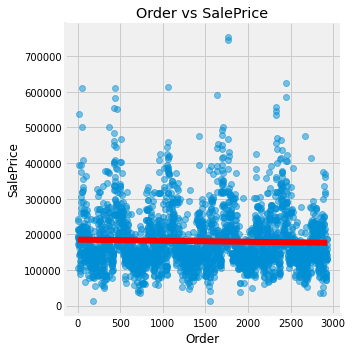

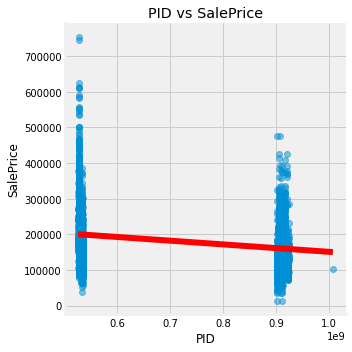

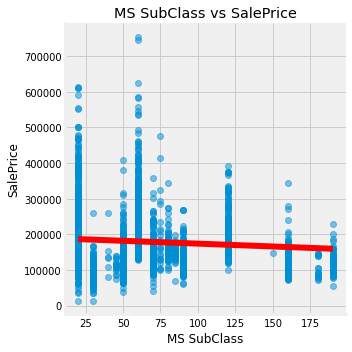

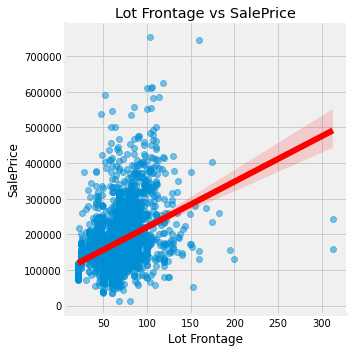

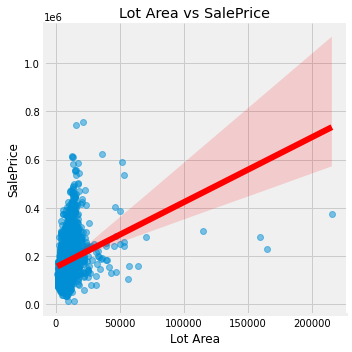

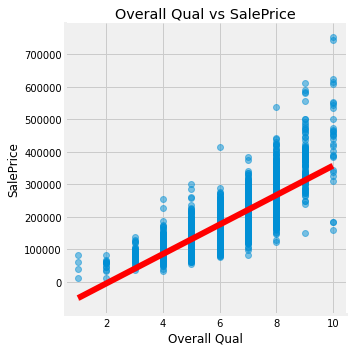

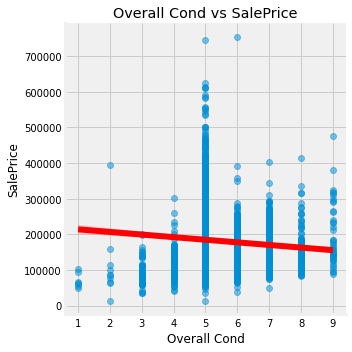

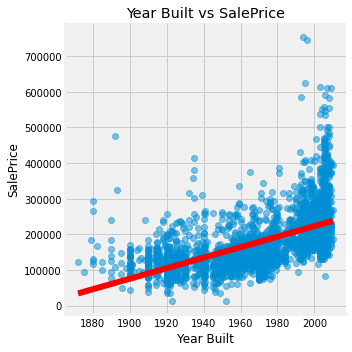

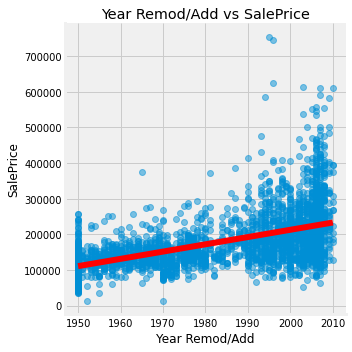

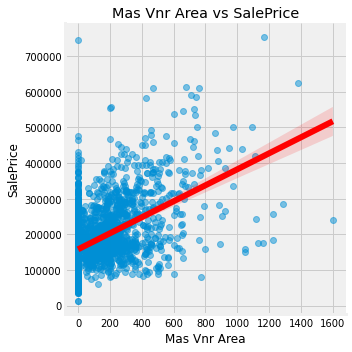

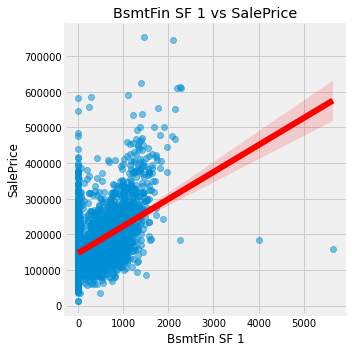

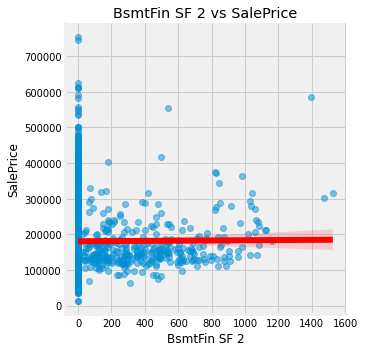

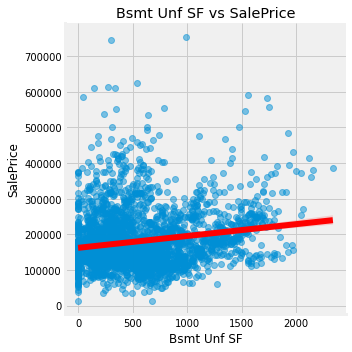

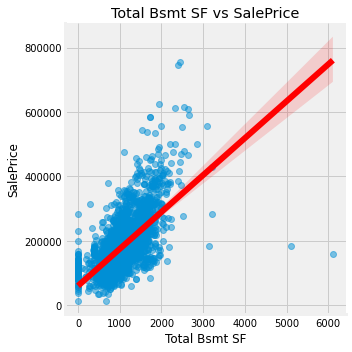

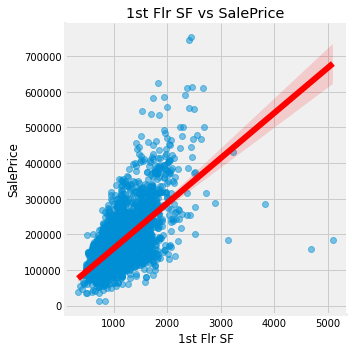

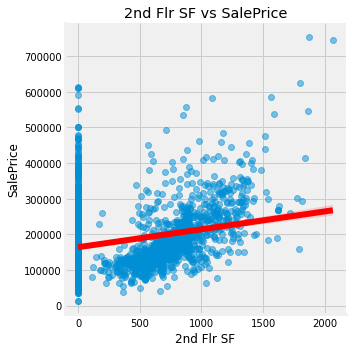

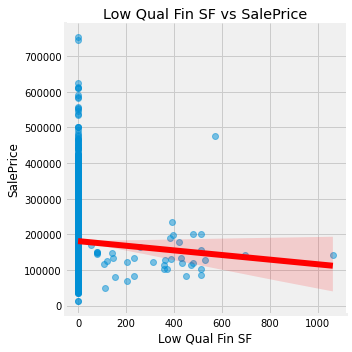

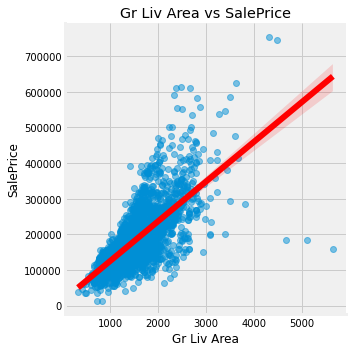

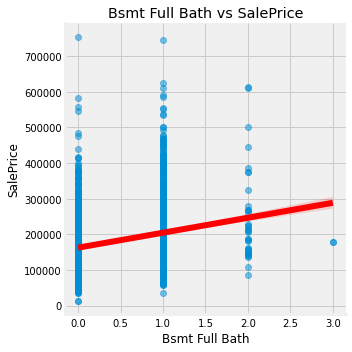

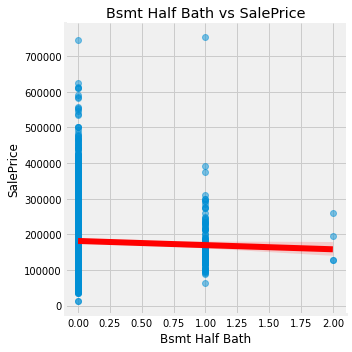

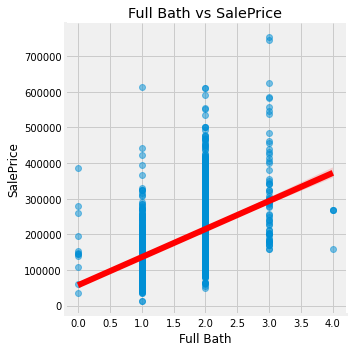

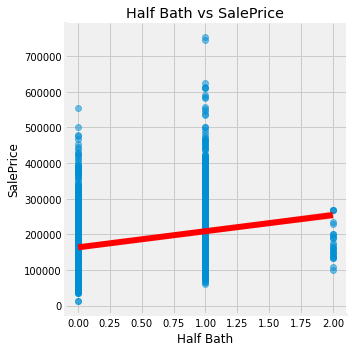

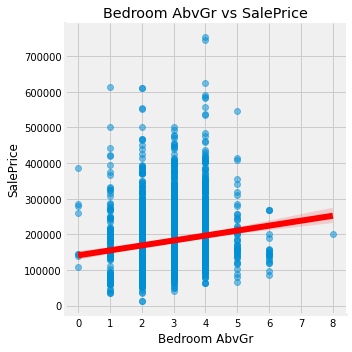

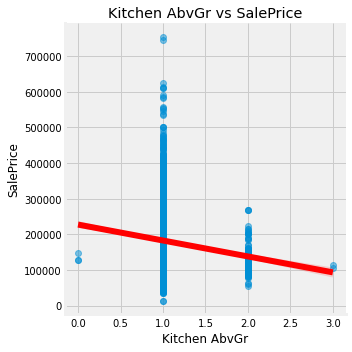

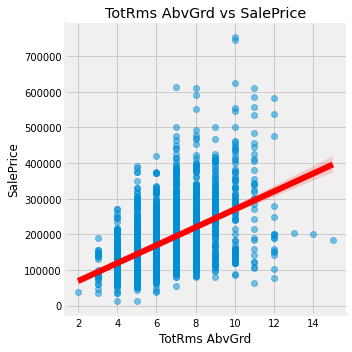

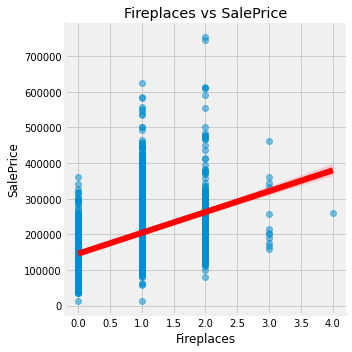

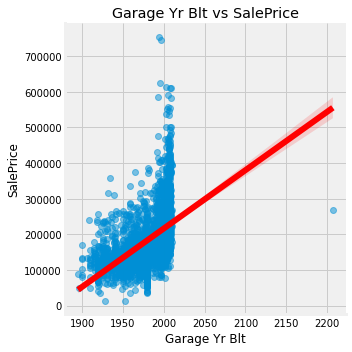

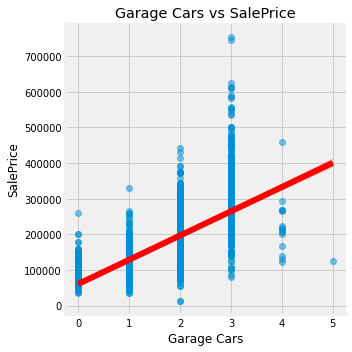

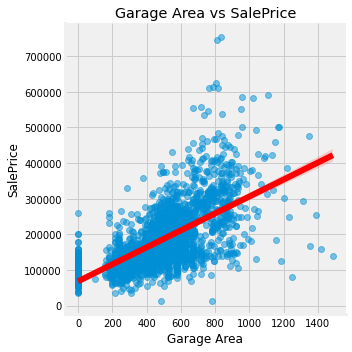

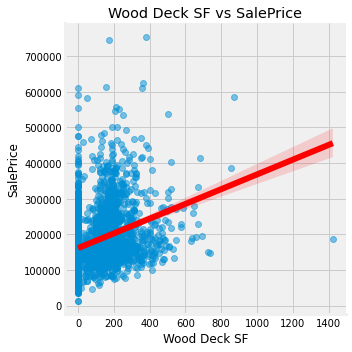

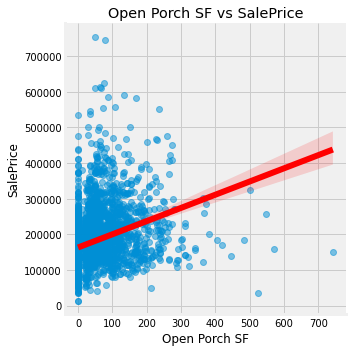

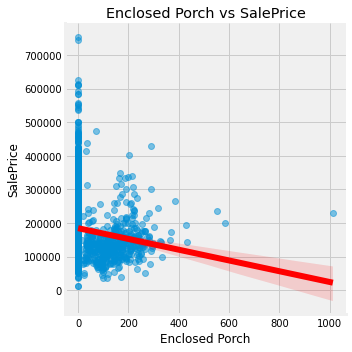

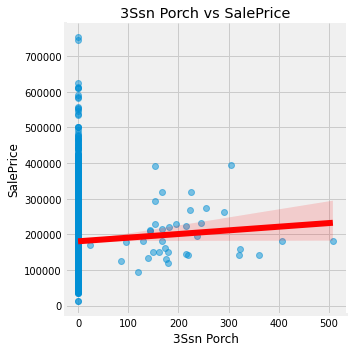

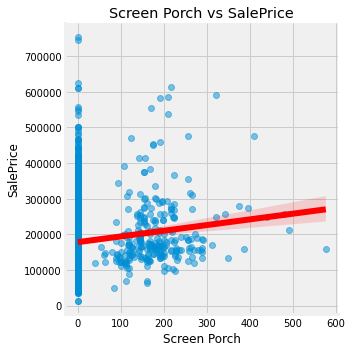

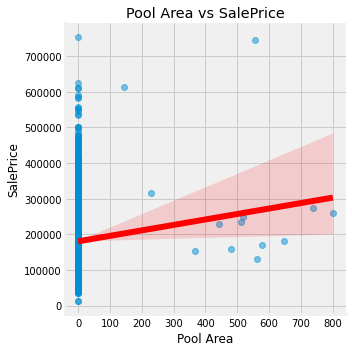

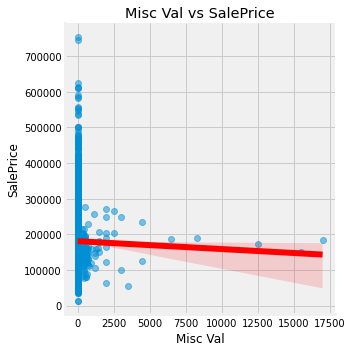

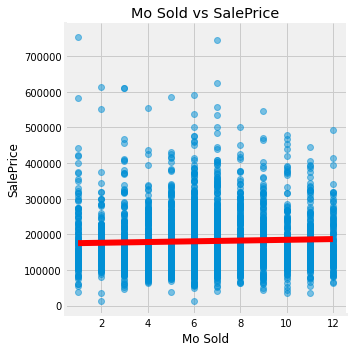

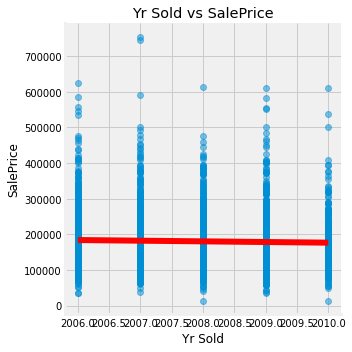

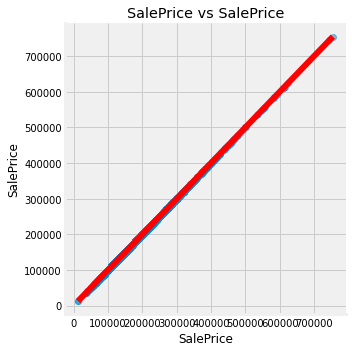

In [25]:
# to assess linear relationships and trends.

df_num = df.select_dtypes(include = 'number')

for i in range(0, df_num.shape[1], 4):
    x_cols = df_num.columns[i:i+4]

    for col in x_cols:
        sns.lmplot(data=df_num, x=col, y='SalePrice', line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
        plt.title(f'{col} vs SalePrice')
        plt.tight_layout()



# 5. Model Preparation

In [16]:
# features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log-transforming target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


# 6. Model Training & Evaluation

In [17]:
# Linear Regression pipeline
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline_lr.fit(X_train, y_train_log)
y_pred_log = pipeline_lr.predict(X_test)

# Inverse transforming  predictions
y_pred_lr = np.expm1(y_pred_log)
y_true = y_test.values 


rmse = mean_squared_error(y_true, y_pred_lr, squared=False)
r2 = r2_score(y_true, y_pred_lr)
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R²: {r2:.4f}")

Linear Regression RMSE: 38469.67
Linear Regression R²: 0.8154


In [18]:
# Random Forest pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

pipeline_rf.fit(X_train, y_train_log)
y_pred_log = pipeline_rf.predict(X_test)

# Inverse transforming  predictions
y_pred_rf = np.expm1(y_pred_log)


rmse_rf = mean_squared_error(y_true, y_pred_rf, squared=False)  # This is already RMSE
r2_rf = r2_score(y_true, y_pred_rf)
print(f'Random Forest RMSE: {rmse_rf:.4f}')
print(f'Random Forest R²: {r2_rf:.4f}')

Random Forest RMSE: 26859.2334
Random Forest R²: 0.9100


In [19]:
#XGBoost Pipeline

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])


pipeline_xgb.fit(X_train, y_train_log)
y_pred_log = pipeline_xgb.predict(X_test)

# Inverse transforming  predictions
y_pred_xgb = np.expm1(y_pred_log)  


rmse_xgb = mean_squared_error(y_true, y_pred_xgb, squared=False) 
r2_xgb = r2_score(y_true, y_pred_xgb)
print(f'XGBoost RMSE: {rmse_xgb:.4f}')
print(f'XGBoost R²: {r2_xgb:.4f}')

XGBoost RMSE: 24088.4769
XGBoost R²: 0.9276
